# Requirements

In [2]:
# Add as many imports as you need.
import pandas as pd

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the primary objective is to use Long Short-Term Memory (LSTM) networks for time series forecasting in order to predict the current **close price** of the Dow Jones Industrial Average index. To accomplish this use data from the past 7 days, which includes numeric information and news information. The goal is to employ LSTM, a type of recurrent neural network, to effectively forecast one future step for the index price (the following day).


## The DIJA Dataset

This dataset consists of daily price records for the value of the Dow Jones Industrial Average index. The dataset includes the following attributes:

- Date - date in the format YYYY-MM-DD,
- Open - open price of the index on the specified date
- Close - close price of the index on the specified date
- High - high price of the index on the specified date
- Low - low price of the index on the specified date
- Volume - number of trades



## The Reddit News Dataset

This dataset consists of news headlines for a certain date that might impact the price:

- Date - date in the format YYYY-MM-DD,
- News - news headline scraped from Reddit

<b>Note: You might have multiple headlines for each date. The number of news per date might not be the same for each date. <b>

Load the datasets into a `pandas` data frame.

In [9]:
# Write your code here. Add as many boxes as you need.
data1 = pd.read_csv('DJIA_table.csv')

In [10]:
data1.head() #DIJA DATASET

,Date,Open,High,Low,Close,Volume
0,7/1/2016,17924.24023,18002.38086,17916.91016,17949.36914,82160000
1,6/30/2016,17712.75977,17930.60938,17711.80078,17929.99023,133030000
2,6/29/2016,17456.01953,17704.50977,17456.01953,17694.67969,106380000
3,6/28/2016,17190.50977,17409.72070,17190.50977,17409.72070,112190000
4,6/27/2016,17355.21094,17355.21094,17063.08008,17140.24023,138740000


In [11]:
data2 = pd.read_csv('RedditNews.csv')

In [12]:
data2.head() #REDDIT NEWS

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


Merge the datasets (be careful you can get multiple rows per date which is not desirable)

In [14]:
# Write your code here. Add as many boxes as you need.
data1['Date'] = pd.to_datetime(data1['Date'])
data2['Date'] = pd.to_datetime(data2['Date'])

In [15]:
data1.head()

,Date,Open,High,Low,Close,Volume
0,2016-07-01,17924.24023,18002.38086,17916.91016,17949.36914,82160000
1,2016-06-30,17712.75977,17930.60938,17711.80078,17929.99023,133030000
2,2016-06-29,17456.01953,17704.50977,17456.01953,17694.67969,106380000
3,2016-06-28,17190.50977,17409.72070,17190.50977,17409.72070,112190000
4,2016-06-27,17355.21094,17355.21094,17063.08008,17140.24023,138740000


In [16]:
data2.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [17]:
data = pd.merge(data1, data2, on='Date', how='inner')

In [18]:
data.head()

,Date,Open,High,Low,Close,Volume,News
0,2016-07-01,17924.24023,18002.38086,17916.91016,17949.36914,82160000,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,17924.24023,18002.38086,17916.91016,17949.36914,82160000,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,17924.24023,18002.38086,17916.91016,17949.36914,82160000,"The president of France says if Brexit won, so..."
3,2016-07-01,17924.24023,18002.38086,17916.91016,17949.36914,82160000,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,17924.24023,18002.38086,17916.91016,17949.36914,82160000,100+ Nobel laureates urge Greenpeace to stop o...


## Feauture Extraction


1. DIJA Table
Apply a lag of one, up to 7 days to each feature, creating a set of features representing the index price from the previous 7 days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

2. Reddit News Table
Create a numeric representation for the news (for example average embedding or average sentiment). <b> You must create lags of the news features as well since we will not know the news for the future. </b>

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [20]:
from textblob import TextBlob

In [21]:
# Write your code here. Add as many boxes as you need.

lag_range = 7

# Create lag features for stock columns: Open, High, Low, Volume
for col in ['Open', 'High', 'Low', 'Volume']:
    for lag in range(1, lag_range + 1):
        data[f'{col}_t-{lag}'] = data[col].shift(lag)

# Apply sentiment analysis to the 'News' column
data['sentiment'] = data['News'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Create lag features for sentiment
for lag in range(1, lag_range + 1):
    data[f'sentiment_t-{lag}'] = data['sentiment'].shift(lag)

# Drop rows with missing values (due to lagging)
data = data.dropna()
data = data.drop(columns=['Open','High','Low','Volume','News','Date'],axis=1)

In [22]:
data.head()

,Close,Open_t-1,Open_t-2,Open_t-3,Open_t-4,Open_t-5,Open_t-6,Open_t-7,High_t-1,High_t-2,...,Volume_t-6,Volume_t-7,sentiment,sentiment_t-1,sentiment_t-2,sentiment_t-3,sentiment_t-4,sentiment_t-5,sentiment_t-6,sentiment_t-7
7,17949.36914,17924.24023,17924.24023,17924.24023,17924.24023,17924.24023,17924.24023,17924.24023,18002.38086,18002.38086,...,82160000.0,82160000.0,0.250000,-0.200000,0.40,0.00,0.111111,0.000000,0.000000,-0.066667
8,17949.36914,17924.24023,17924.24023,17924.24023,17924.24023,17924.24023,17924.24023,17924.24023,18002.38086,18002.38086,...,82160000.0,82160000.0,0.000000,0.250000,-0.20,0.40,0.000000,0.111111,0.000000,0.000000
9,17949.36914,17924.24023,17924.24023,17924.24023,17924.24023,17924.24023,17924.24023,17924.24023,18002.38086,18002.38086,...,82160000.0,82160000.0,0.500000,0.000000,0.25,-0.20,0.400000,0.000000,0.111111,0.000000
10,17949.36914,17924.24023,17924.24023,17924.24023,17924.24023,17924.24023,17924.24023,17924.24023,18002.38086,18002.38086,...,82160000.0,82160000.0,-0.127778,0.500000,0.00,0.25,-0.200000,0.400000,0.000000,0.111111
11,17949.36914,17924.24023,17924.24023,17924.24023,17924.24023,17924.24023,17924.24023,17924.24023,18002.38086,18002.38086,...,82160000.0,82160000.0,0.000000,-0.127778,0.50,0.00,0.250000,-0.200000,0.400000,0.000000


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [24]:
# Write your code here. Add as many boxes as you need.
input = data.drop(['Close'], axis=1)
target = data['Close']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(input, target, test_size=0.2, shuffle = False)

## Feauture Scaling
Scale the extracted features using an appropriate scaler if needed.

In [28]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Feature Reshaping

Reshape the feature dimensions into the shape `(samples, timesteps, features)`.

In [33]:
# Find a time_steps value that divides the number of features
new_time_steps = X_train.shape[1]  # You can also try a different value based on trial and error
features = X_train.shape[1] // new_time_steps  # Calculate the corresponding number of features

# Reshape the data
X_train_reshaped = X_train.reshape((X_train.shape[0], new_time_steps, features))
X_test_reshaped = X_test.reshape((X_test.shape[0], new_time_steps, features))

# Proceed with model training



## Long Short-Term Memory (LSTM) Network


Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

In [36]:
# Write your code here. Add as many boxes as you need.
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [37]:
model = Sequential()
model.add(Dense(units=1))
model.add(LSTM(units=64, return_sequences=True, input_shape=(new_time_steps, features)))  # Input shape for LSTM
model.add(Dropout(0.2))
model.add(LSTM(units=32, return_sequences=False))  # Second LSTM layer
model.add(Dropout(0.2))
model.add(Dense(units=1))  

Compile the previously defined model specifying **loss function** (`keras.losses`), **optimizer** (`keras.optimizers`) and **evaluation metrics** (`keras.metics`).

In [39]:
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import MeanAbsoluteError, RootMeanSquaredError


In [40]:
# Write your code here. Add as many boxes as you need.
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with a learning rate of 0.001
    loss=MeanSquaredError(),  # Loss function: Mean Squared Error for regression tasks
    metrics=[MeanAbsoluteError(), RootMeanSquaredError()]  # Metrics: MAE and RMSE
)

Train the model on the training set, specifying the **batch size** and **number of epochs** for the training process. Allocate 20% of the samples for **validation**, and ensure that the dataset remains **unshuffled** during training.

In [42]:
# Write your code here. Add as many boxes as you need.
# Train the model

history = model.fit(
    X_train_reshaped,  
    Y_train,  
    batch_size=64,  
    epochs=64,  
    validation_split=0.2,  
    shuffle=False,  
    verbose=1 
)



Epoch 1/64
498/498 [==============================] - 17s 25ms/step - loss: 239152096.0000 - mean_absolute_error: 15313.4355 - root_mean_squared_error: 15464.5430 - val_loss: 126766816.0000 - val_mean_absolute_error: 11229.5283 - val_root_mean_squared_error: 11259.0771
Epoch 2/64
498/498 [==============================] - 11s 23ms/step - loss: 238653232.0000 - mean_absolute_error: 15297.1816 - root_mean_squared_error: 15448.4053 - val_loss: 126435808.0000 - val_mean_absolute_error: 11214.9111 - val_root_mean_squared_error: 11244.3682
Epoch 3/64
498/498 [==============================] - 12s 25ms/step - loss: 238170496.0000 - mean_absolute_error: 15281.4033 - root_mean_squared_error: 15432.7734 - val_loss: 126103416.0000 - val_mean_absolute_error: 11200.1963 - val_root_mean_squared_error: 11229.5781
Epoch 4/64
498/498 [==============================] - 12s 24ms/step - loss: 237689216.0000 - mean_absolute_error: 15265.6494 - root_mean_squared_error: 15417.1729 - val_loss: 125769568.0000 

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

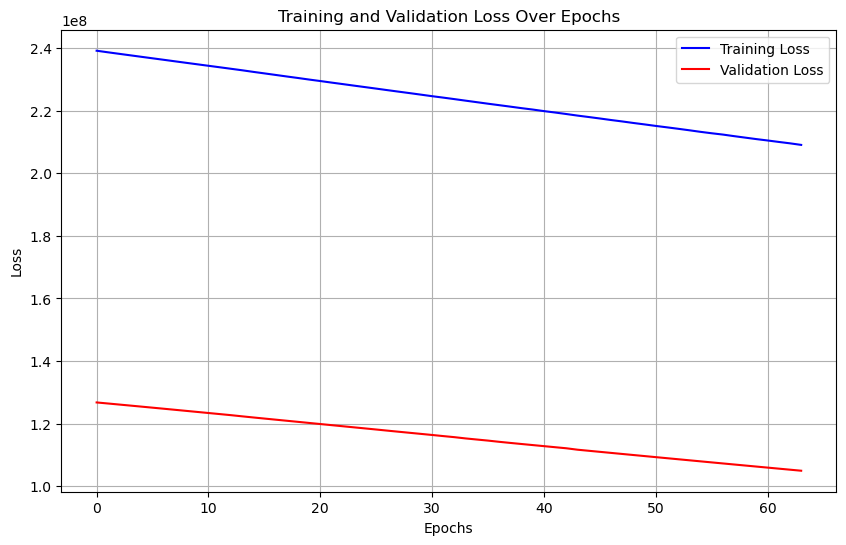

In [44]:
# Write your code here. Add as many boxes as you need.
import matplotlib.pyplot as plt

# Extract loss and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Use the trained model to make predictions for the test set.

In [46]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(X_test_reshaped)

311/311 [==============================] - 3s 6ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [48]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [49]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 8597.289757813758
Mean Squared Error (MSE): 74839204.11908562
Root Mean Squared Error (RMSE): 8650.965502132443
R-squared (R²): -53.962600458228124


Create a line plot in order to compare the actual and predicted mean temperatures for the test set.

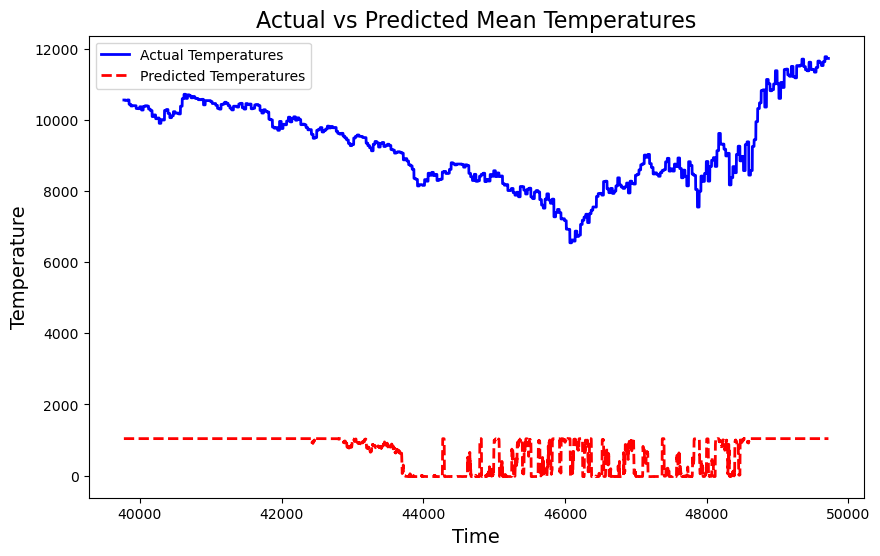

In [84]:
# Write your code here. Add as many boxes as you need.
import matplotlib.pyplot as plt

# Assuming y_pred contains the model's predictions and Y_test contains the true values
# Plot actual vs predicted temperatures
plt.figure(figsize=(10,6))

# Plotting actual temperatures (Y_test)
plt.plot(Y_test.index, Y_test, label="Actual Temperatures", color='blue', linewidth=2)

# Plotting predicted temperatures (y_pred)
plt.plot(Y_test.index, y_pred, label="Predicted Temperatures", color='red', linestyle='--', linewidth=2)

# Adding titles and labels
plt.title("Actual vs Predicted Mean Temperatures", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature", fontsize=14)

# Adding a legend
plt.legend()

# Display the plot
plt.show()